## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade |
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [5]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

boston = fetch_openml(data_id=42165)
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target, name='MEDV')


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,12,2008,WD,Normal


In [7]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: MEDV, dtype: int64

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

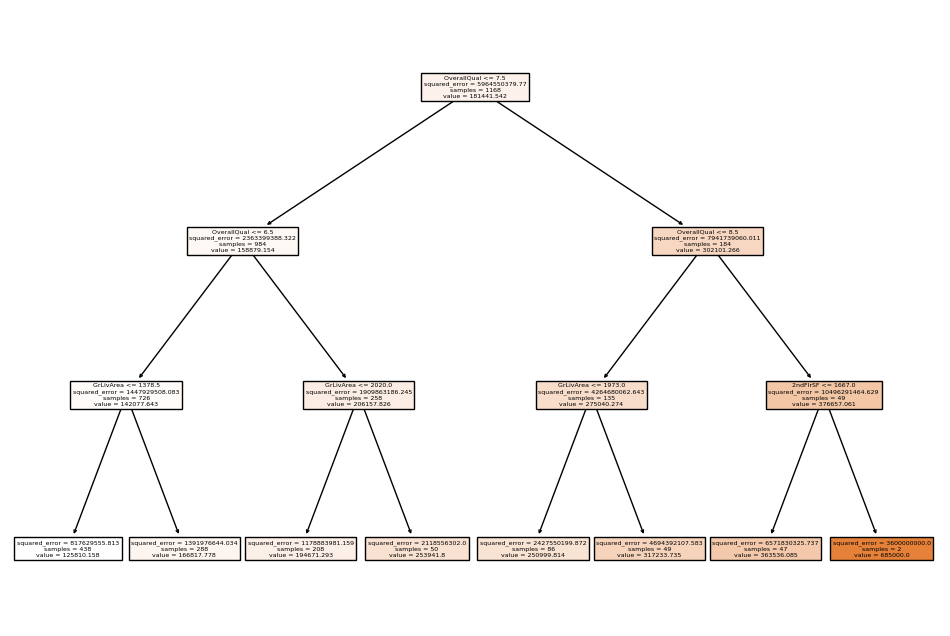

In [11]:
from sklearn.impute import SimpleImputer

# Passo 1: Preencher os valores ausentes (NaN)
imputer = SimpleImputer(strategy='mean')  # Você pode escolher 'median', 'most_frequent', ou outro
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Passo 2: Treinar a árvore de regressão
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train, y_train)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(tree_reg, filled=True, feature_names=X.columns)
plt.show()


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [12]:
import numpy as np

importancias = tree_reg.feature_importances_

limiar = 0.1

indices_variaveis_significativas = np.where(importancias > limiar)[0]

def rastrear_caminho_arvore(node, caminho_atual):
    if tree_reg.tree_.children_left[node] == tree_reg.tree_.children_right[node]:
        return [caminho_atual]
    else:
        caminhos = []
        caminho_esquerda = rastrear_caminho_arvore(tree_reg.tree_.children_left[node], caminho_atual + [tree_reg.tree_.feature[node]])
        caminho_direita = rastrear_caminho_arvore(tree_reg.tree_.children_right[node], caminho_atual + [tree_reg.tree_.feature[node]])
        caminhos.extend(caminho_esquerda)
        caminhos.extend(caminho_direita)
        return caminhos

caminhos_ccp_alfas = []
for indice_variavel in indices_variaveis_significativas:
    caminhos_variavel = rastrear_caminho_arvore(0, [tree_reg.tree_.feature[0]])
    for caminho in caminhos_variavel:
        if indice_variavel in caminho:
            caminhos_ccp_alfas.append(caminho)

print("Caminhos indicados pelos CCP-alfas:")
for caminho in caminhos_ccp_alfas:
    print(caminho)


Caminhos indicados pelos CCP-alfas:
[17, 17, 17, 46]
[17, 17, 17, 46]
[17, 17, 17, 46]
[17, 17, 17, 46]
[17, 17, 17, 46]
[17, 17, 17, 46]
[17, 17, 17, 44]
[17, 17, 17, 44]
[17, 17, 17, 46]
[17, 17, 17, 46]
[17, 17, 17, 46]
[17, 17, 17, 46]
[17, 17, 17, 46]
[17, 17, 17, 46]


### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [14]:
from sklearn.tree import DecisionTreeRegressor

alphas = [17, 17, 17, 46]

arvores = []

for alpha in alphas:
    tree_reg = DecisionTreeRegressor(ccp_alpha=alpha)
    tree_reg.fit(X_train, y_train)
    arvores.append(tree_reg)


### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [15]:
from sklearn.metrics import mean_squared_error

mse_por_arvore = []

for tree_reg in arvores:
    y_pred = tree_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_por_arvore.append(mse)


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

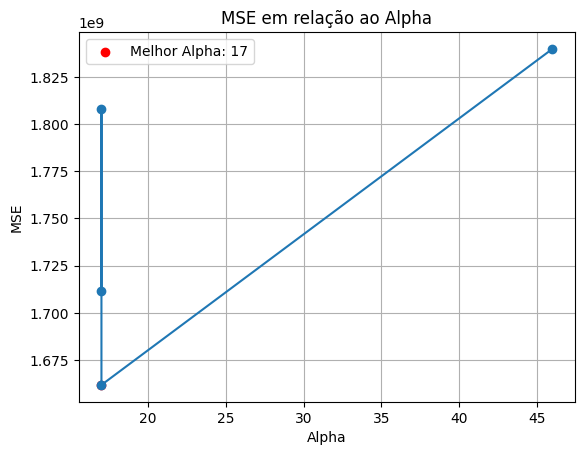

In [16]:
import matplotlib.pyplot as plt

alphas = [17, 17, 17, 46]

mse_por_alpha = []

for alpha in alphas:
    tree_reg = DecisionTreeRegressor(ccp_alpha=alpha)
    tree_reg.fit(X_train, y_train)

    y_pred = tree_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_por_alpha.append(mse)

plt.plot(alphas, mse_por_alpha, marker='o')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE em relação ao Alpha')
plt.grid(True)

min_mse_index = mse_por_alpha.index(min(mse_por_alpha))
best_alpha = alphas[min_mse_index]

plt.scatter(best_alpha, min(mse_por_alpha), color='red', label=f'Melhor Alpha: {best_alpha}')
plt.legend()

plt.show()


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [17]:
from sklearn.metrics import r2_score

best_alpha_tree_reg = DecisionTreeRegressor(ccp_alpha=best_alpha)
best_alpha_tree_reg.fit(X_train, y_train)

y_pred_best_alpha = best_alpha_tree_reg.predict(X_test)

r2 = r2_score(y_test, y_pred_best_alpha)

print(f"R-quadrado: {r2}")


R-quadrado: 0.7276325321601905


### 7. Visualize esta árvore.

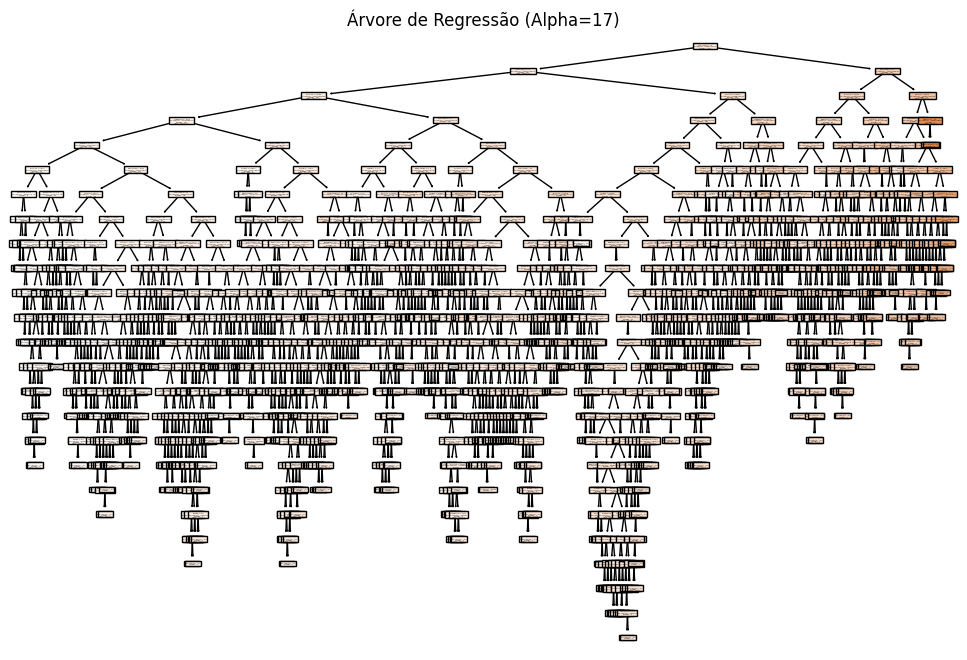

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

best_alpha_tree_reg = DecisionTreeRegressor(ccp_alpha=best_alpha)
best_alpha_tree_reg.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(best_alpha_tree_reg, filled=True, feature_names=X.columns)
plt.title(f"Árvore de Regressão (Alpha={best_alpha})")
plt.show()
